# Lab 1 - Pre-Processing Data

Use this notebook to explore and prepare the image data that you will work with in subsequent labs.

## Set Up Data Folder Paths
The raw data is provided in the **../data/voc** folder. You must process this data and save the processed versions of the image files in the **../data/classification/training** folder, retaining the same structure of subfolders for each category of image.

In [1]:
src_folder = "../data/voc"
train_folder = "../data/classification/training"

## Explore the Images
In the following cell, add code to iterate through subfolders in the **voc** folder, and display the first image in each subfolder. Each subfolder represents a category, or *class*, of image.

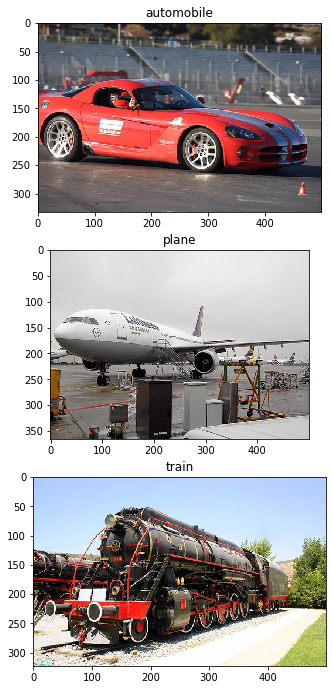

In [2]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# Set up a figure of an appropriate size
fig = plt.figure(figsize=(12, 16))

# loop through the subfolders
dir_num = 0
for root, folders, filenames in os.walk(src_folder):
    for folder in folders:
        # Load the first image file using the PIL library
        file = os.listdir(os.path.join(root,folder))[0]
        imgFile = os.path.join(root,folder, file)
        img = Image.open(imgFile)
        # Add the image to the figure (which will have 4 rows and enough columns to show a file from each folder)
        a=fig.add_subplot(4,np.ceil(len(folders)/4),dir_num + 1)
        imgplot = plt.imshow(img)
        # Add a caption with the folder name
        a.set_title(folder)
        dir_num = dir_num + 1


## Standardize the Images
The images vary in size and shape. Most machine learning techniques for computer vision work best when the image data is a consistent format and size, so you must prepare the data accordingly.

Run the code in the following cell to standarize the images so that they are all 128x128 JPG files while retaining their original aspect-ratio, and save them in the same subfolder structure in a new **training** folder.

In [3]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Helper function to resize image
def resize_image(src_image, size=(128,128), bg_color="white"): 
    from PIL import Image, ImageOps 
    
    # resize the image so the longest dimension matches our target size
    src_image.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new square background image
    new_image = Image.new("RGB", size, bg_color)
    
    # Paste the resized image into the center of the square background
    new_image.paste(src_image, (int((size[0] - src_image.size[0]) / 2), int((size[1] - src_image.size[1]) / 2)))
  
    # return the resized image
    return new_image


# Create resized copies of all of the source images
size = (128,128)

# Create the output folder if it doesn't already exist
if os.path.exists(train_folder):
    shutil.rmtree(train_folder)

# Loop through each subfolder in the input folder
for root, folders, files in os.walk(src_folder):
    for sub_folder in folders:
        print('processing folder ' + sub_folder)
        # Create a matching subfolder in the output dir
        saveFolder = os.path.join(train_folder,sub_folder)
        if not os.path.exists(saveFolder):
            os.makedirs(saveFolder)
        # Loop through the files in the subfolder
        file_names = os.listdir(os.path.join(root,sub_folder))
        for file_name in file_names:
            # Open the file
            file_path = os.path.join(root,sub_folder, file_name)
            print("reading " + file_path)
            image = Image.open(file_path)
            # Create a resized version and save it
            resized_image = resize_image(image, size)
            saveAs = os.path.join(saveFolder, file_name)
            print("writing " + saveAs)
            resized_image.save(saveAs)
            

processing folder automobile
reading ../data/voc\automobile\000131.jpg
writing ../data/classification/training\automobile\000131.jpg
reading ../data/voc\automobile\000142.jpg
writing ../data/classification/training\automobile\000142.jpg
reading ../data/voc\automobile\000180.jpg
writing ../data/classification/training\automobile\000180.jpg
reading ../data/voc\automobile\000220.jpg
writing ../data/classification/training\automobile\000220.jpg
reading ../data/voc\automobile\000303.jpg
writing ../data/classification/training\automobile\000303.jpg
reading ../data/voc\automobile\000461.jpg
writing ../data/classification/training\automobile\000461.jpg
reading ../data/voc\automobile\000474.jpg
writing ../data/classification/training\automobile\000474.jpg
reading ../data/voc\automobile\000522.jpg
writing ../data/classification/training\automobile\000522.jpg
reading ../data/voc\automobile\000653.jpg
writing ../data/classification/training\automobile\000653.jpg
reading ../data/voc\automobile\0006

writing ../data/classification/training\plane\000763.jpg
reading ../data/voc\plane\000815.jpg
writing ../data/classification/training\plane\000815.jpg
reading ../data/voc\plane\000845.jpg
writing ../data/classification/training\plane\000845.jpg
reading ../data/voc\plane\000896.jpg
writing ../data/classification/training\plane\000896.jpg
reading ../data/voc\plane\001107.jpg
writing ../data/classification/training\plane\001107.jpg
reading ../data/voc\plane\001144.jpg
writing ../data/classification/training\plane\001144.jpg
reading ../data/voc\plane\001270.jpg
writing ../data/classification/training\plane\001270.jpg
reading ../data/voc\plane\001288.jpg
writing ../data/classification/training\plane\001288.jpg
reading ../data/voc\plane\001545.jpg
writing ../data/classification/training\plane\001545.jpg
reading ../data/voc\plane\001708.jpg
writing ../data/classification/training\plane\001708.jpg
reading ../data/voc\plane\001858.jpg
writing ../data/classification/training\plane\001858.jpg
rea

reading ../data/voc\train\002600.jpg
writing ../data/classification/training\train\002600.jpg
reading ../data/voc\train\002757.jpg
writing ../data/classification/training\train\002757.jpg
reading ../data/voc\train\002844.jpg
writing ../data/classification/training\train\002844.jpg
reading ../data/voc\train\002891.jpg
writing ../data/classification/training\train\002891.jpg
reading ../data/voc\train\002906.jpg
writing ../data/classification/training\train\002906.jpg
reading ../data/voc\train\003038.jpg
writing ../data/classification/training\train\003038.jpg
reading ../data/voc\train\003370.jpg
writing ../data/classification/training\train\003370.jpg
reading ../data/voc\train\003417.jpg
writing ../data/classification/training\train\003417.jpg
reading ../data/voc\train\003464.jpg
writing ../data/classification/training\train\003464.jpg
reading ../data/voc\train\003497.jpg
writing ../data/classification/training\train\003497.jpg
reading ../data/voc\train\003499.jpg
writing ../data/classif

## Compare the Original and Resized Images
Run the code in the following cell to view the original and resized version of the first image in each subfolder.

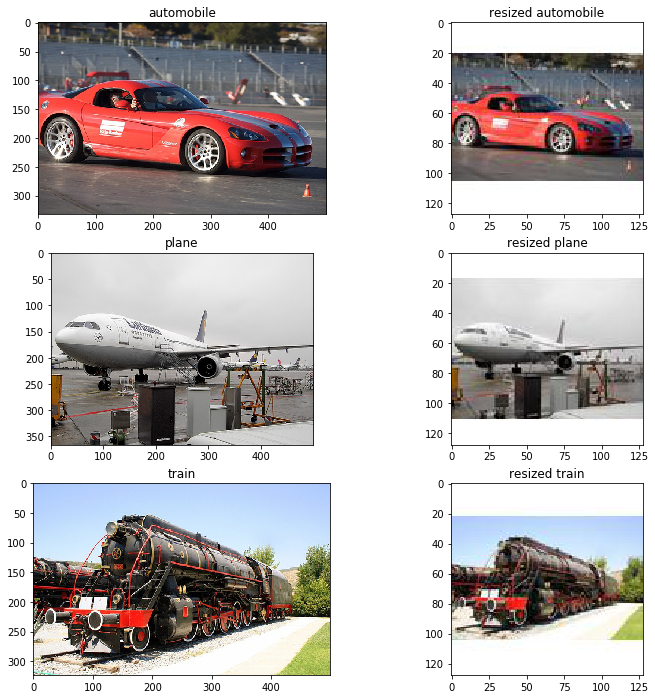

In [4]:
# Create a new figure
fig = plt.figure(figsize=(12,12))

# loop through the subfolders in the input directory
image_num = 0
for root, folders, filenames in os.walk(src_folder):
    for folder in folders:
        # Get the first image in the subfolder and add it to a plot that has two columns and row for each folder
        file = os.listdir(os.path.join(root,folder))[0]
        src_file = os.path.join(src_folder,folder, file)
        src_image = Image.open(src_file)
        image_num += 1
        a=fig.add_subplot(len(folders), 2, image_num)
        imgplot = plt.imshow(src_image)
        a.set_title(folder)
        # The next image is the resized counterpart - load and plot it
        resized_file = os.path.join(train_folder,folder, file)
        resized_image = Image.open(resized_file)
        image_num += 1
        b=fig.add_subplot(len(folders), 2, image_num)
        imgplot = plt.imshow(resized_image)
        b.set_title('resized ' + folder)
        